# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import torch
import numpy as np
from collections import deque
from unityagents import UnityEnvironment

import matplotlib.pyplot as plt
%matplotlib inline

# Watch for changes in any of the imported files
%load_ext autoreload
%autoreload 2

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to the environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += rewards                                  # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.1599999964237213


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

The task is episodic, and in order to solve the environment, your agent must get an average score of +30 over 100 consecutive episodes.

In [5]:
def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [6]:
# Note: `brain_name` should be defined globally
def env_step(env, actions):
    # Execute the action for each agent in the environment
    env_info = env.step(actions)[brain_name]
    # Get the next state for each agent
    next_states = env_info.vector_observations
    # Get the reward for each agent
    rewards = env_info.rewards
    # Get whether or not the episode has terminated
    dones = env_info.local_done
    return next_states, rewards, dones

In [7]:
def train_ddpg(agent, n_episodes=1000, max_t=1000, eps_start=1.0, 
               eps_end=0.01, eps_decay=0.995, save_file=None):
    """Deep Deterministic Policy Gradients.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of time steps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    
    # All the scores from each episode
    scores_all = []
    # The last 100 scores
    scores_window = deque(maxlen=100)
    # Initialize epsilon (the exploration factor)
    eps = eps_start
    
    # Loop over each episode
    for i_episode in range(1, n_episodes+1):
        # Reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        # Get the current state for each agent
        states = env_info.vector_observations
        # Reset the noise
        agent.reset()
        # Initialize the score for each agent
        scores = np.zeros(num_agents)
        
        # Loop over each time step
        for t in range(max_t):            
            # Select an action for each agent according to the current policy
            actions = agent.act(states)
            # Execute the actions in the environment,
            #     then observe the next state and reward for each agent
            next_states, rewards, dones = env_step(env, actions)
            # Learn from experience and update network parameters for each agent
            agent.step(states, actions, rewards, next_states, dones)
            
            # Update the score for each agent
            scores += rewards
            # Roll over each state to the next time step
            states = next_states
            # Record the current mean score across all agents, (overwriting the output)
            print(f'\rEpisode {i_episode}\tTimestep {t}'
                  f'\tCurrent Score: {np.mean(scores):.2f}', end="")
            # Exit the loop if the episode has terminated
            if np.any(dones):
                break
        
        # Take the average score across all agents
        score = np.mean(scores)
        # Save the most recent score
        scores_all.append(score)
        scores_window.append(score)
        # Record the mean score over the last 100 scores
        mean_score = np.mean(scores_window)
        # Decrease epsilon
        eps = max(eps_end, eps_decay*eps)
                
        # Per episode, record the mean score over the last 100 (or less) episodes
        print(f'\rEpisode {i_episode}'
              f'\tAverage score over the last 100 episodes: {mean_score:.2f}')
            
        # Goal: Reach 30+ over 100 consecutive episodes
        if mean_score >= 30.0:
            print(f'\nEnvironment solved in {i_episode:d} episodes!'
                  f'\tAverage score over the last 100 episodes: {mean_score:.2f}')
            if save_file:
                torch.save(agent.actor_local.state_dict(), f'{save_file}_actor.pth')
                torch.save(agent.critic_local.state_dict(), f'{save_file}_critic.pth')
            break
            
    return scores_all

#### Initial Run

In [8]:
from ddpg_agent import Agent

Episode 1	Average score over the last 100 episodes: 0.25
Episode 2	Average score over the last 100 episodes: 0.24
Episode 3	Average score over the last 100 episodes: 0.41
Episode 4	Average score over the last 100 episodes: 0.56
Episode 5	Average score over the last 100 episodes: 0.65
Episode 6	Average score over the last 100 episodes: 0.72
Episode 7	Average score over the last 100 episodes: 0.75
Episode 8	Average score over the last 100 episodes: 0.76
Episode 9	Average score over the last 100 episodes: 0.80
Episode 10	Average score over the last 100 episodes: 0.84
Episode 11	Average score over the last 100 episodes: 0.88
Episode 12	Average score over the last 100 episodes: 0.91
Episode 13	Average score over the last 100 episodes: 0.91
Episode 14	Average score over the last 100 episodes: 0.93
Episode 15	Average score over the last 100 episodes: 0.97
Episode 16	Average score over the last 100 episodes: 1.01
Episode 17	Average score over the last 100 episodes: 1.07
Episode 18	Average scor

Episode 141	Average score over the last 100 episodes: 14.45
Episode 142	Average score over the last 100 episodes: 14.54
Episode 143	Average score over the last 100 episodes: 14.60
Episode 144	Average score over the last 100 episodes: 14.69
Episode 145	Average score over the last 100 episodes: 14.83
Episode 146	Average score over the last 100 episodes: 14.92
Episode 147	Average score over the last 100 episodes: 15.03
Episode 148	Average score over the last 100 episodes: 15.13
Episode 149	Average score over the last 100 episodes: 15.22
Episode 150	Average score over the last 100 episodes: 15.32
Episode 151	Average score over the last 100 episodes: 15.40
Episode 152	Average score over the last 100 episodes: 15.50
Episode 153	Average score over the last 100 episodes: 15.59
Episode 154	Average score over the last 100 episodes: 15.68
Episode 155	Average score over the last 100 episodes: 15.80
Episode 156	Average score over the last 100 episodes: 15.92
Episode 157	Average score over the last 

Episode 277	Average score over the last 100 episodes: 29.85
Episode 278	Average score over the last 100 episodes: 29.88
Episode 279	Average score over the last 100 episodes: 29.88
Episode 280	Average score over the last 100 episodes: 29.93
Episode 281	Average score over the last 100 episodes: 29.99
Episode 282	Average score over the last 100 episodes: 30.03

Environment solved in 282 episodes!	Average score over the last 100 episodes: 30.03


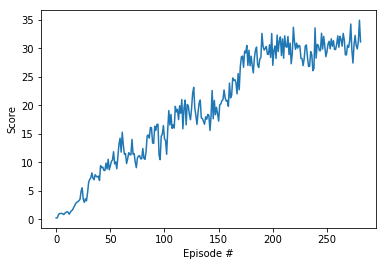

In [9]:
# Instantiate the agent
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)

# Train the DDPG agent
scores = train_ddpg(agent, save_file='checkpoint')

# Plot the scores
plot_scores(scores)

#### 5 Trials on Hyperparameter Tuning

In [8]:
from ddpg_agent import Agent

In [9]:
# Try 300 and 150 units for the first and second hidden layers, respectively
#     (for both actor and critic networks)
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='trial_01')
plot_scores(scores)

Episode 1	Average score over the last 100 episodes: 0.08
Episode 2	Average score over the last 100 episodes: 0.25
Episode 3	Average score over the last 100 episodes: 0.42
Episode 4	Average score over the last 100 episodes: 0.47
Episode 5	Average score over the last 100 episodes: 0.56
Episode 6	Average score over the last 100 episodes: 0.57
Episode 7	Average score over the last 100 episodes: 0.62
Episode 8	Average score over the last 100 episodes: 0.70
Episode 9	Average score over the last 100 episodes: 0.70
Episode 10	Average score over the last 100 episodes: 0.73
Episode 11	Average score over the last 100 episodes: 0.68
Episode 12	Average score over the last 100 episodes: 0.73
Episode 13	Average score over the last 100 episodes: 0.77
Episode 14	Average score over the last 100 episodes: 0.81
Episode 15	Average score over the last 100 episodes: 0.84
Episode 16	Average score over the last 100 episodes: 0.89
Episode 17	Average score over the last 100 episodes: 0.92
Episode 18	Average scor

KeyboardInterrupt: 